# Homework 05

Training a CNN for CIFAR-10 data

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.layers

information on the dataset:
- 60.000 colour images (5:1 ratio for training and test iamges)
- labeled with 10 classes (6.000 images per class)
- feature dictionary comes with:
  - id (string)
  - image (uint8) -> shape (32, 32, 3) -> 3 is the colour channel (r,g,b)
  - label (int64)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incomplete3WFP0I/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incomplete3WFP0I/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


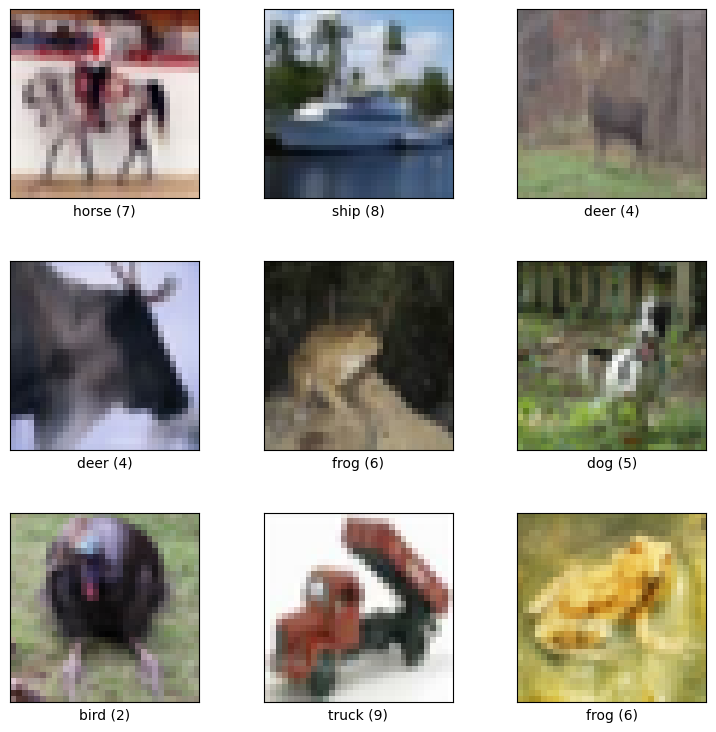

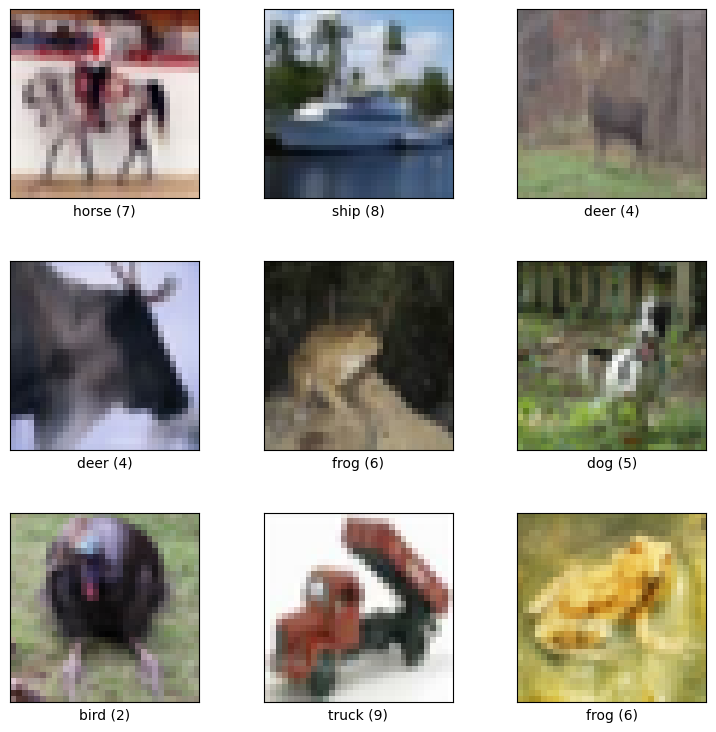

In [2]:
(train_ds, test_ds), ds_info = tfds.load(name='cifar10', split=['train', 'test'], as_supervised=True, with_info=True)
tfds.show_examples(train_ds, ds_info)

## 1.1 Prepare the dataset

In [3]:
def prep_data(img, target):

  # no reshaping/flattening needed since we use CNNs
  # convert img values to float
  img = tf.cast(img, tf.float32)
  # pseudo-normalize image values
  img = img/128-1
  # one hot encode the targets
  target = tf.one_hot(target, depth=10)

  return img, target

def load_and_prep_data(batch_size, shuffle_buffer_size):

  # load the tensorflow dataset
  train_ds, test_ds = tfds.load(name='cifar10', split=['train', 'test'], as_supervised=True)

  # preprocess the data
  train_ds = train_ds.map(lambda img, target: prep_data(img, target))
  test_ds = test_ds.map(lambda img, target: prep_data(img, target))

  # suffle, batch, prefetch the data
  train_ds = train_ds.shuffle(shuffle_buffer_size).batch(batch_size).prefetch(2)
  test_ds = test_ds.shuffle(shuffle_buffer_size).batch(batch_size).prefetch(2)

  return train_ds, test_ds

## 1.2 The CNN Model

in VGG style

### Model 1

In [4]:
class cifar10Model1(tf.keras.Model):

  def __init__(self):
    super(cifar10Model1, self).__init__()

    # defining the CNN model
    # shape of the input (disregarding batching): 32x32x1

    # block 1
    self.convl1 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, strides=1, padding='same', activation='relu') # expanding last output dimension by 24: input: 32x32x1, output: 32x32x24
    self.convl2 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, strides=1, padding='same', activation='relu') # input: 32x32x24, output: 32x32x24
    self.convl3 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, strides=1, padding='same', activation='relu') # input: 32x32x24, output: 32x32x24
    self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2) # dividing image size by 2: # input: 32x32x24, output: 16x16x24

    # block 2
    self.convl4 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, strides=1, padding='same', activation='relu') # expanding last output dimension by 24: input: 16x16x24, output: 16x16x48
    self.convl5 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, strides=1, padding='same', activation='relu') # input: 16x16x48, output: 16x16x48
    self.convl6 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, strides=1, padding='same', activation='relu') # input: 16x16x48, output: 16x16x48
    #self.pool2 = tf.keras.layers.GlobalMaxPooling2D(pool_size=2, strides=2) # dividing image size by 2:  # input: 16x16x48, output: 8x8x48
    self.global_pool = tf.keras.layers.GlobalAvgPool2D() # vectorizing the image:  # input: 16x16x48, output: 1x1x48

    self.out = tf.keras.layers.Dense(10, activation='softmax')


  def call(self, x):

    # forward propagation block 1
    x = self.convl1(x)
    x = self.convl2(x)
    x = self.convl3(x)
    x = self.pool1(x)

    # forward propagation block2
    x = self.convl4(x)
    x = self.convl5(x)
    x = self.convl6(x)
    x = self.global_pool(x)

    # output layer propagation
    x = self.out(x)

    return x

### Model 2

A second CNN Model to explore the influence of model architecture parameters (task 2) like:
- number of layers
- size of layers

In [29]:
class cifar10Model2(tf.keras.Model):

  def __init__(self):
    super(cifar10Model2, self).__init__()

    # defining the CNN model
    # shape of the input (disregarding batching): 32x32x1

    # block 1
    self.convl1 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, strides=1, padding='same', activation='relu') # expanding last output dimension by 24: input: 32x32x1, output: 32x32x24
    self.convl2 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, strides=1, padding='same', activation='relu') # input: 32x32x24, output: 32x32x24
    self.convl3 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, strides=1, padding='same', activation='relu') # input: 32x32x24, output: 32x32x24
    self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2) # dividing image size by 2: # input: 32x32x24, output: 16x16x24

    # block 2
    self.convl4 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, strides=1, padding='same', activation='relu') # expanding last output dimension by 24: input: 16x16x24, output: 16x16x48
    self.convl5 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, strides=1, padding='same', activation='relu') # input: 16x16x48, output: 16x16x48
    self.convl6 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, strides=1, padding='same', activation='relu') # input: 16x16x48, output: 16x16x48
    self.pool2 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2) # dividing image size by 2:  # input: 16x16x48, output: 8x8x48

    # block 3
    self.convl7 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, strides=1, padding='same', activation='relu') # expanding last output dimension by 24: input: 8x8x48, output: 8x8x72
    self.convl8 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, strides=1, padding='same', activation='relu') # input: 8x8x72, output: 8x8x72
    self.convl9 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, strides=1, padding='same', activation='relu') # input: 8x8x72, output: 8x8x72
    self.global_pool = tf.keras.layers.GlobalAvgPool2D() # vectorizing the image:  # input: 8x8x72, output: 1x1x72

    self.out = tf.keras.layers.Dense(10, activation='softmax')


  def call(self, x):

    # forward propagation block 1
    x = self.convl1(x)
    x = self.convl2(x)
    x = self.convl3(x)
    x = self.pool1(x)

    # forward propagation block2
    x = self.convl4(x)
    x = self.convl5(x)
    x = self.convl6(x)
    x = self.pool2(x)

    # forward propagation block3
    x = self.convl7(x)
    x = self.convl8(x)
    x = self.convl9(x)

    x = self.global_pool(x)

    # output layer propagation
    x = self.out(x)

    return x

### Model 3

In [15]:
class cifar10Model3(tf.keras.Model):

  def __init__(self):
    super(cifar10Model3, self).__init__()

    # defining the CNN model
    # shape of the input (disregarding batching): 32x32x1

    # block 1
    self.convl1 = tf.keras.layers.Conv2D(filters=48, kernel_size=3, strides=1, padding='same', activation='relu') # expanding last output dimension by 48: input: 32x32x1, output: 32x32x48
    self.convl2 = tf.keras.layers.Conv2D(filters=48, kernel_size=3, strides=1, padding='same', activation='relu') # input: 32x32x48, output: 32x32x48
    self.convl3 = tf.keras.layers.Conv2D(filters=48, kernel_size=3, strides=1, padding='same', activation='relu') # input: 32x32x48, output: 32x32x48
    self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2) # dividing image size by 2: # input: 32x32x48, output: 16x16x48

    # block 2
    self.convl4 = tf.keras.layers.Conv2D(filters=48, kernel_size=3, strides=1, padding='same', activation='relu') # expanding last output dimension by 48: input: 16x16x48, output: 16x16x96
    self.convl5 = tf.keras.layers.Conv2D(filters=48, kernel_size=3, strides=1, padding='same', activation='relu') # input: 16x16x96, output: 16x16x96
    self.convl6 = tf.keras.layers.Conv2D(filters=48, kernel_size=3, strides=1, padding='same', activation='relu') # input: 16x16x96, output: 16x16x96
    self.global_pool = tf.keras.layers.GlobalAvgPool2D() # vectorizing the image:  # input: 8x8x96, output: 1x1x96

    self.out = tf.keras.layers.Dense(10, activation='softmax')


  def call(self, x):

    # forward propagation block 1
    x = self.convl1(x)
    x = self.convl2(x)
    x = self.convl3(x)
    x = self.pool1(x)

    # forward propagation block2
    x = self.convl4(x)
    x = self.convl5(x)
    x = self.convl6(x)

    x = self.global_pool(x)

    # output layer propagation
    x = self.out(x)

    return x

## 1.3 Training the network

In [13]:
# helper functions for training and testing the network

# train and test step: just propagating one data sample through the net

# train step
# one forward and backwards step of the input respective target in the neural network
def train_step(model, input, target, loss_func, optimizer):
  with tf.GradientTape() as tape:
    pred = model(input) # if it does not work -> model(x)
    loss = loss_func(target, pred)
    acc = np.argmax(target, axis=1) == np.argmax(pred, axis=1)
    acc = np.mean(acc)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  return loss, acc

# test step
def test_step(model, input, target, loss_func):
  pred = model(input)
  loss = loss_func(target, pred)
  acc = np.argmax(target, axis=1) == np.argmax(pred, axis=1)
  acc = np.mean(acc)

  return loss, acc


# train and test loop:

# train loop
def train_loop(model, train_ds, loss_func, optimizer):

  losses_per_epoch_train = []
  accs_per_epoch_train = []

  for input, target in train_ds:
      loss, acc = train_step(model=model, input=input, target=target, loss_func=loss_func, optimizer=optimizer)
      losses_per_epoch_train.append(loss)
      accs_per_epoch_train.append(acc)

  return losses_per_epoch_train, accs_per_epoch_train

# test loop
def test_loop(model, test_ds, loss_func):

  losses_per_epoch_test = []
  accs_per_epoch_test = []

  for input, target in test_ds:
      loss, acc = test_step(model=model, input=input, target=target, loss_func=loss_func)
      losses_per_epoch_test.append(loss)
      accs_per_epoch_test.append(acc)

  return losses_per_epoch_test, accs_per_epoch_test

# actual function

# train test loop
# actual function that trains and tests the network num_epoch times
# training the whole network num_epoch times
def train_test_loop(model, train_ds, test_ds, loss_func, optimizer, num_epochs=10):

  train_losses = []
  train_accs = []
  test_losses = []
  test_accs = []

  # for each epoch: train the network with all training data
  for epoch in range(num_epochs):

    # training
    # for each data sample in the training dataset: train_step for loss and acc
    losses_per_epoch_train, accs_per_epoch_train = train_loop(model=model, train_ds=train_ds, loss_func=loss_func, optimizer=optimizer)
    # track loss and acc of training data for each epoch by taking mean of loss and acc of all data samples
    train_losses.append(tf.reduce_mean(losses_per_epoch_train))
    train_accs.append(tf.reduce_mean(accs_per_epoch_train))


    # testing
    # for each data sample in the testing dataset: test_step for loss and acc
    # evaluating the performance of the network in after the current epoch
    losses_per_epoch_test, accs_per_epoch_test = test_loop(model=model, test_ds=test_ds, loss_func=loss_func)
    # track loss and acc of test data for each epoch
    test_losses.append(tf.reduce_mean(losses_per_epoch_test))
    test_accs.append(tf.reduce_mean(accs_per_epoch_test))

    print(f' After epoch {str(epoch)} the test accuracy is: {test_accs[-1]}')
    #print(f' After epoch {str(epoch)} the test loss is: {test_losses[-1]}')

  # after the network is trained (and tested) num_epoch times
  # train and test losses and accs for each epoch are returned
  return train_losses, train_accs, test_losses, test_accs



Create Model

In [10]:
def create_and_run_cifar_model(batch_size, shuffle_buffer_size, loss_func, optimizer, model_nb=1, num_epochs=10):

  # loading the data
  train_ds, test_ds = load_and_prep_data(batch_size=BATCH_SIZE, shuffle_buffer_size=SHUFFLE_BUFFER_SIZE)
  # instantiating the model
  if model_nb==1:
    model = cifar10Model1()
  elif model_nb==2:
    model = cifar10Model2()
  elif model_nb==3:
    model = cifar10Model3()

  # train and testing the model
  train_losses, train_accs, test_losses, test_accs = train_test_loop(model=model, train_ds=train_ds, test_ds=test_ds, loss_func=LOSS_FUNC, optimizer=OPTIMIZER, num_epochs=NUM_EPOCHS)

  return train_losses, train_accs, test_losses, test_accs

## 1.4 Visualization

visualizing for train and testing of the model the losses and accuracies after every epoch

In [25]:
def visualization(train_losses, train_accs, test_losses, test_accs):

  # create 4 subplots
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

  # train losses
  ax1.plot(train_losses, color='red', label='Train')
  ax1.set_title('Train Losses')

  # train accuracy
  ax2.plot(train_accs, color="red", label="Train")
  ax2.set_title("Train Accuracy")

  # test losses
  ax3.plot(test_losses, color="blue", label="Test")
  ax3.set_title('Test Losses')

  # test accuracy
  ax4.plot(test_accs, color="blue", label="Test")
  ax4.set_title("Test Accuracy")

  # draw gridlines
  ax1.grid(True)
  ax2.grid(True)
  ax3.grid(True)
  ax4.grid(True)

  # formatting of the plots
  fig_title = 'Evaluation: Training vs. Testing'
  fig.suptitle(fig_title)
  ax1.set_xlabel("Epochs")
  ax2.set_xlabel("Epochs")
  ax3.set_xlabel("Epochs")
  ax4.set_xlabel("Epochs")
  fig.legend(loc='outside right upper')
  fig.tight_layout()
  plt.show()

# Adjusting hyperparameters and architecture

Exploring the influence hyperparameter and training choices
can make:
- Two different Learning Rates
- Two different Architectures (e.g. number and size of layers)
- Two different optimizers (Including Adam and one other)
- in total 8 settings with respective visualizations

## three different architectures
- model 1: 2 blocks with 3 Conv2D layers each and 24 filters each
- model 2: 3 blocks with 3 Conv2D layers each and 24 filters each
- model 3: 2 blocks with 3 Conv2D layers each and 48 filters each

-> model 1 and 2 have different number of blocks/layers  
-> model 1 and 3 have different number of filters per layer

**Setting 1:** model 1  
2 blocks with 3 Conv2D layers each and 24 filters each

 After epoch 0 the test accuracy is: 0.48552316293929715
 After epoch 1 the test accuracy is: 0.5540135782747604
 After epoch 2 the test accuracy is: 0.6032348242811502
 After epoch 3 the test accuracy is: 0.6299920127795527
 After epoch 4 the test accuracy is: 0.6459664536741214
 After epoch 5 the test accuracy is: 0.6460662939297125
 After epoch 6 the test accuracy is: 0.6546525559105432
 After epoch 7 the test accuracy is: 0.6761182108626198
 After epoch 8 the test accuracy is: 0.6785143769968051
 After epoch 9 the test accuracy is: 0.6688298722044729
 After epoch 10 the test accuracy is: 0.6972843450479234
 After epoch 11 the test accuracy is: 0.702076677316294


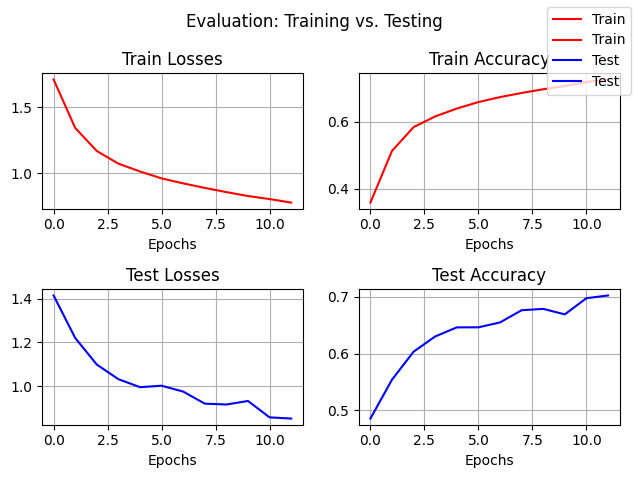

In [27]:
# defining hyperparameters for the model
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

LOSS_FUNC = tf.keras.losses.CategoricalCrossentropy()

LR = 0.001
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LR)

MODEL_NB = 1
NUM_EPOCHS = 12

# creating, training and testing the model
train_losses, train_accs, test_losses, test_accs = create_and_run_cifar_model(batch_size=BATCH_SIZE, shuffle_buffer_size=SHUFFLE_BUFFER_SIZE, loss_func=LOSS_FUNC, optimizer=OPTIMIZER, model_nb=MODEL_NB, num_epochs=NUM_EPOCHS)
visualization(train_losses, train_accs, test_losses, test_accs)

**Setting 2:** model 2  
3 blocks with 3 Conv2D layers each and 24 filters each

 After epoch 0 the test accuracy is: 0.4682507987220447
 After epoch 1 the test accuracy is: 0.5897563897763578
 After epoch 2 the test accuracy is: 0.6421725239616614
 After epoch 3 the test accuracy is: 0.6669329073482428
 After epoch 4 the test accuracy is: 0.6824081469648562
 After epoch 5 the test accuracy is: 0.7075678913738019
 After epoch 6 the test accuracy is: 0.7143570287539937
 After epoch 7 the test accuracy is: 0.7212460063897763
 After epoch 8 the test accuracy is: 0.7212460063897763
 After epoch 9 the test accuracy is: 0.7269369009584664
 After epoch 10 the test accuracy is: 0.7307308306709265
 After epoch 11 the test accuracy is: 0.7383186900958466


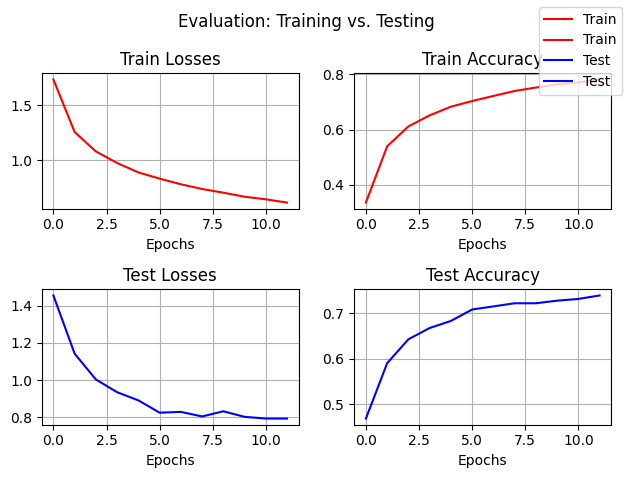

In [30]:
# defining hyperparameters for the model
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

LOSS_FUNC = tf.keras.losses.CategoricalCrossentropy()

LR = 0.001
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LR)

MODEL_NB = 2
NUM_EPOCHS = 12

# creating, training and testing the model
train_losses, train_accs, test_losses, test_accs = create_and_run_cifar_model(batch_size=BATCH_SIZE, shuffle_buffer_size=SHUFFLE_BUFFER_SIZE, loss_func=LOSS_FUNC, optimizer=OPTIMIZER, model_nb=MODEL_NB, num_epochs=NUM_EPOCHS)
visualization(train_losses, train_accs, test_losses, test_accs)

**Setting 3:** model 3  
2 blocks with 3 Conv2D layers each and 48 filters each

 After epoch 0 the test accuracy is: 0.5388378594249201
 After epoch 1 the test accuracy is: 0.6393769968051118
 After epoch 2 the test accuracy is: 0.6701277955271565
 After epoch 3 the test accuracy is: 0.6806110223642172
 After epoch 4 the test accuracy is: 0.7188498402555911
 After epoch 5 the test accuracy is: 0.7365215654952076
 After epoch 6 the test accuracy is: 0.7305311501597445
 After epoch 7 the test accuracy is: 0.7633785942492013
 After epoch 8 the test accuracy is: 0.762979233226837
 After epoch 9 the test accuracy is: 0.7623801916932907
 After epoch 10 the test accuracy is: 0.7827476038338658
 After epoch 11 the test accuracy is: 0.7741613418530351


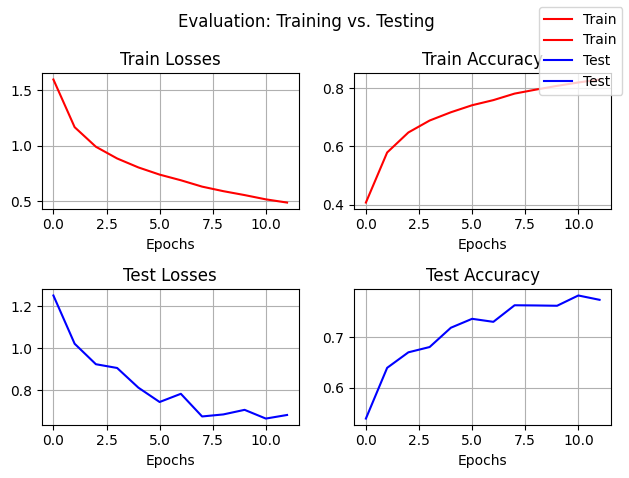

In [31]:
# defining hyperparameters for the model
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

LOSS_FUNC = tf.keras.losses.CategoricalCrossentropy()

LR = 0.001
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LR)

MODEL_NB = 3
NUM_EPOCHS = 12

# creating, training and testing the model
train_losses, train_accs, test_losses, test_accs = create_and_run_cifar_model(batch_size=BATCH_SIZE, shuffle_buffer_size=SHUFFLE_BUFFER_SIZE, loss_func=LOSS_FUNC, optimizer=OPTIMIZER, model_nb=MODEL_NB, num_epochs=NUM_EPOCHS)
visualization(train_losses, train_accs, test_losses, test_accs)

## two different learning rates

**Setting 4:** learning rate = 0.001

 After epoch 0 the test accuracy is: 0.46565495207667734
 After epoch 1 the test accuracy is: 0.5429313099041534
 After epoch 2 the test accuracy is: 0.5693889776357828
 After epoch 3 the test accuracy is: 0.6047324281150159
 After epoch 4 the test accuracy is: 0.6206070287539937
 After epoch 5 the test accuracy is: 0.6549520766773163
 After epoch 6 the test accuracy is: 0.6476637380191693
 After epoch 7 the test accuracy is: 0.6535543130990416
 After epoch 8 the test accuracy is: 0.6836062300319489
 After epoch 9 the test accuracy is: 0.6998801916932907
 After epoch 10 the test accuracy is: 0.6945886581469649
 After epoch 11 the test accuracy is: 0.6961861022364217


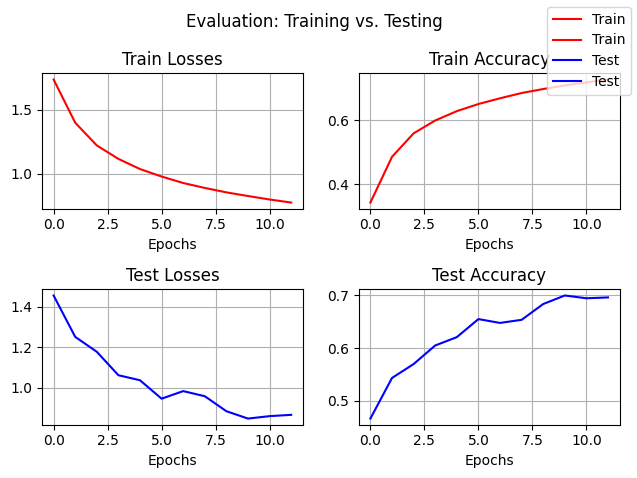

In [32]:
# defining hyperparameters for the model
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

LOSS_FUNC = tf.keras.losses.CategoricalCrossentropy()

LR = 0.001
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LR)

MODEL_NB = 1
NUM_EPOCHS = 12

# creating, training and testing the model
train_losses, train_accs, test_losses, test_accs = create_and_run_cifar_model(batch_size=BATCH_SIZE, shuffle_buffer_size=SHUFFLE_BUFFER_SIZE, loss_func=LOSS_FUNC, optimizer=OPTIMIZER, model_nb=MODEL_NB, num_epochs=NUM_EPOCHS)
visualization(train_losses, train_accs, test_losses, test_accs)

**Setting 5:** learning rate = 0.001

 After epoch 0 the test accuracy is: 0.32328274760383385
 After epoch 1 the test accuracy is: 0.3789936102236422
 After epoch 2 the test accuracy is: 0.41373801916932906
 After epoch 3 the test accuracy is: 0.4047523961661342
 After epoch 4 the test accuracy is: 0.4252196485623003
 After epoch 5 the test accuracy is: 0.4353035143769968
 After epoch 6 the test accuracy is: 0.44738418530351437
 After epoch 7 the test accuracy is: 0.4623602236421725
 After epoch 8 the test accuracy is: 0.47184504792332266
 After epoch 9 the test accuracy is: 0.48642172523961663
 After epoch 10 the test accuracy is: 0.4866214057507987
 After epoch 11 the test accuracy is: 0.4911142172523962


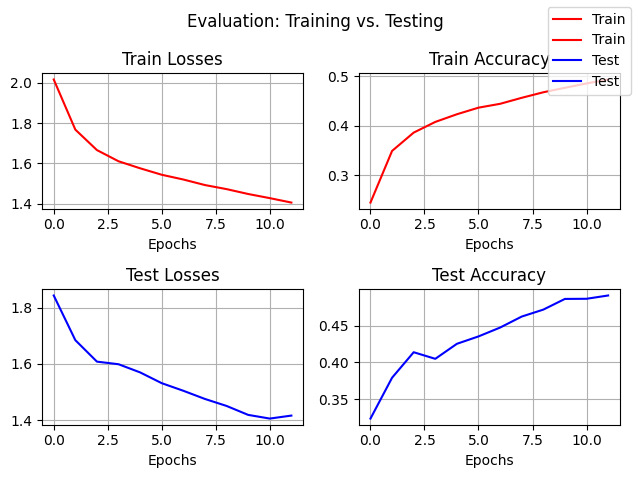

In [33]:
# defining hyperparameters for the model
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

LOSS_FUNC = tf.keras.losses.CategoricalCrossentropy()

LR = 0.0001
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LR)

MODEL_NB = 1
NUM_EPOCHS = 12

# creating, training and testing the model
train_losses, train_accs, test_losses, test_accs = create_and_run_cifar_model(batch_size=BATCH_SIZE, shuffle_buffer_size=SHUFFLE_BUFFER_SIZE, loss_func=LOSS_FUNC, optimizer=OPTIMIZER, model_nb=MODEL_NB, num_epochs=NUM_EPOCHS)
visualization(train_losses, train_accs, test_losses, test_accs)

## two different optimizers

- Adam optimizer
- SGD optimizer

Adam optimizer -> setting 1

**Setting 6:** SGD optimizer

In [1]:
# defining hyperparameters for the model
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

LOSS_FUNC = tf.keras.losses.CategoricalCrossentropy()

LR = 0.001
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=LR)

MODEL_NB = 1
NUM_EPOCHS = 12

# creating, training and testing the model
train_losses, train_accs, test_losses, test_accs = create_and_run_cifar_model(batch_size=BATCH_SIZE, shuffle_buffer_size=SHUFFLE_BUFFER_SIZE, loss_func=LOSS_FUNC, optimizer=OPTIMIZER, model_nb=MODEL_NB, num_epochs=NUM_EPOCHS)
visualization(train_losses, train_accs, test_losses, test_accs)

NameError: ignored

In [ ]:
# defining hyperparameters for the model
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 1000

LOSS_FUNC = tf.keras.losses.CategoricalCrossentropy()

LR = 0.001
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=LR)

MODEL_NB = 1
NUM_EPOCHS = 12

# creating, training and testing the model
train_losses, train_accs, test_losses, test_accs = create_and_run_cifar_model(batch_size=BATCH_SIZE, shuffle_buffer_size=SHUFFLE_BUFFER_SIZE, loss_func=LOSS_FUNC, optimizer=OPTIMIZER, model_nb=MODEL_NB, num_epochs=NUM_EPOCHS)
visualization(train_losses, train_accs, test_losses, test_accs)

 After epoch 0 the test accuracy is: 0.10917595541401273
 After epoch 1 the test accuracy is: 0.11484872611464968
 After epoch 2 the test accuracy is: 0.11265923566878981
 After epoch 3 the test accuracy is: 0.11335589171974522
 After epoch 4 the test accuracy is: 0.11395302547770701
 After epoch 5 the test accuracy is: 0.10429936305732485
 After epoch 6 the test accuracy is: 0.11683917197452229
 After epoch 7 the test accuracy is: 0.1188296178343949
 After epoch 8 the test accuracy is: 0.12211385350318471
 After epoch 9 the test accuracy is: 0.1338574840764331


### two different batch sizes

batch_size = 32 -> setting 1

**Setting 7:** batch size = 64

In [ ]:
# defining hyperparameters for the model
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 1000

LOSS_FUNC = tf.keras.losses.CategoricalCrossentropy()

LR = 0.001
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LR)

MODEL_NB = 1
NUM_EPOCHS = 12

# creating, training and testing the model
train_losses, train_accs, test_losses, test_accs = create_and_run_cifar_model(batch_size=BATCH_SIZE, shuffle_buffer_size=SHUFFLE_BUFFER_SIZE, loss_func=LOSS_FUNC, optimizer=OPTIMIZER, model_nb=MODEL_NB, num_epochs=NUM_EPOCHS)
visualization(train_losses, train_accs, test_losses, test_accs)

In [ ]:
# defining hyperparameters for the model
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 1000

LOSS_FUNC = tf.keras.losses.CategoricalCrossentropy()

LR = 0.001
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LR)

MODEL_NB = 1
NUM_EPOCHS = 12

# creating, training and testing the model
train_losses, train_accs, test_losses, test_accs = create_and_run_cifar_model(batch_size=BATCH_SIZE, shuffle_buffer_size=SHUFFLE_BUFFER_SIZE, loss_func=LOSS_FUNC, optimizer=OPTIMIZER, model_nb=MODEL_NB, num_epochs=NUM_EPOCHS)
visualization(train_losses, train_accs, test_losses, test_accs)

## combination of hyperparameters
combining hyperparameters that seemed to work best

**Setting 8:**
- learning rate:
- model architecture:
- optimizer:
- batch size:

 After epoch 0 the test accuracy is: 0.45431926751592355
 After epoch 1 the test accuracy is: 0.5838972929936306
 After epoch 2 the test accuracy is: 0.6412221337579618
 After epoch 3 the test accuracy is: 0.6656050955414012
 After epoch 4 the test accuracy is: 0.6921775477707006
 After epoch 5 the test accuracy is: 0.6827229299363057
 After epoch 6 the test accuracy is: 0.7268113057324841
 After epoch 7 the test accuracy is: 0.7380573248407644
 After epoch 8 the test accuracy is: 0.7358678343949044
 After epoch 9 the test accuracy is: 0.7379578025477707
 After epoch 10 the test accuracy is: 0.7498009554140127
 After epoch 11 the test accuracy is: 0.7543789808917197


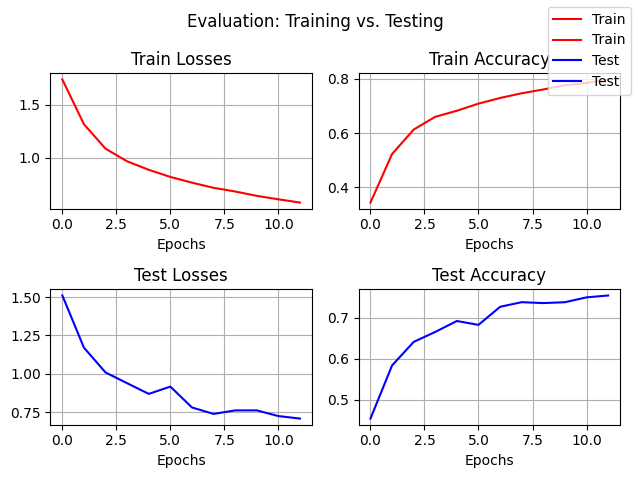

In [36]:
# defining hyperparameters for the model
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 1000

LOSS_FUNC = tf.keras.losses.CategoricalCrossentropy()

LR = 0.001
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LR)

MODEL_NB = 3
NUM_EPOCHS = 12

# creating, training and testing the model
train_losses, train_accs, test_losses, test_accs = create_and_run_cifar_model(batch_size=BATCH_SIZE, shuffle_buffer_size=SHUFFLE_BUFFER_SIZE, loss_func=LOSS_FUNC, optimizer=OPTIMIZER, model_nb=MODEL_NB, num_epochs=NUM_EPOCHS)
visualization(train_losses, train_accs, test_losses, test_accs)